In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

<AxesSubplot:>

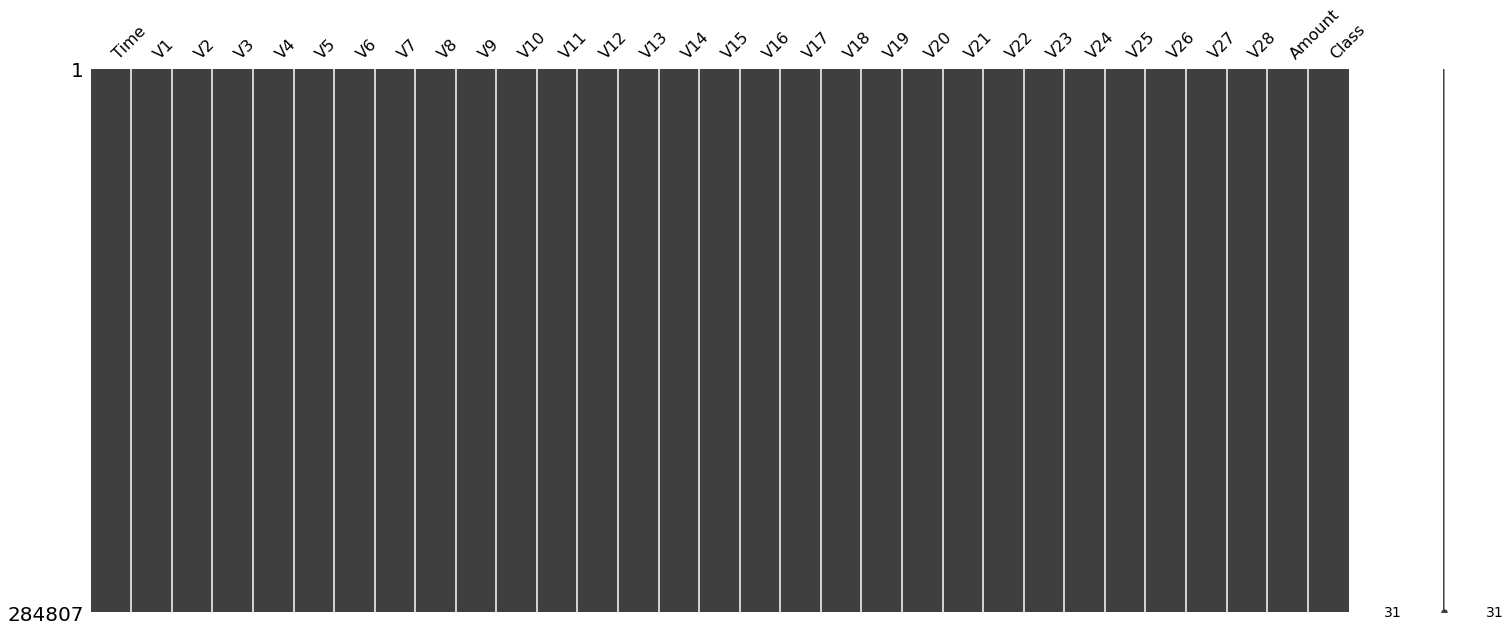

In [4]:
import missingno as msno
msno.matrix(df)

### Removing Dublicates

In [3]:
dumps = df.duplicated()
print('Number of dublicates rows:%d' %dumps.sum())

Number of dublicates rows:1081


In [4]:
#drop duplicated value
print('Number of rows before discarding duplicates = %d' % df.shape[0])

df2 = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % df2.shape[0])

Number of rows before discarding duplicates = 284807
Number of rows after discarding duplicates = 283726


### Imbalanced dataset
    The sets of data in which classes are not evenly distributed, approximately the same number for its class are called     imbalanced datasets.The high accuracy value of the model can be caused by a certain class.

In [5]:
df2.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

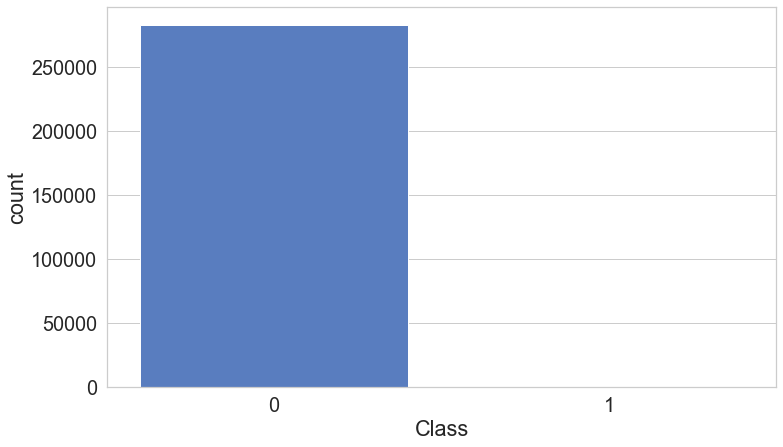

In [8]:
# Visualizing Unbalanced df.Class
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Class', data = df2, palette = 'muted')

<AxesSubplot:>

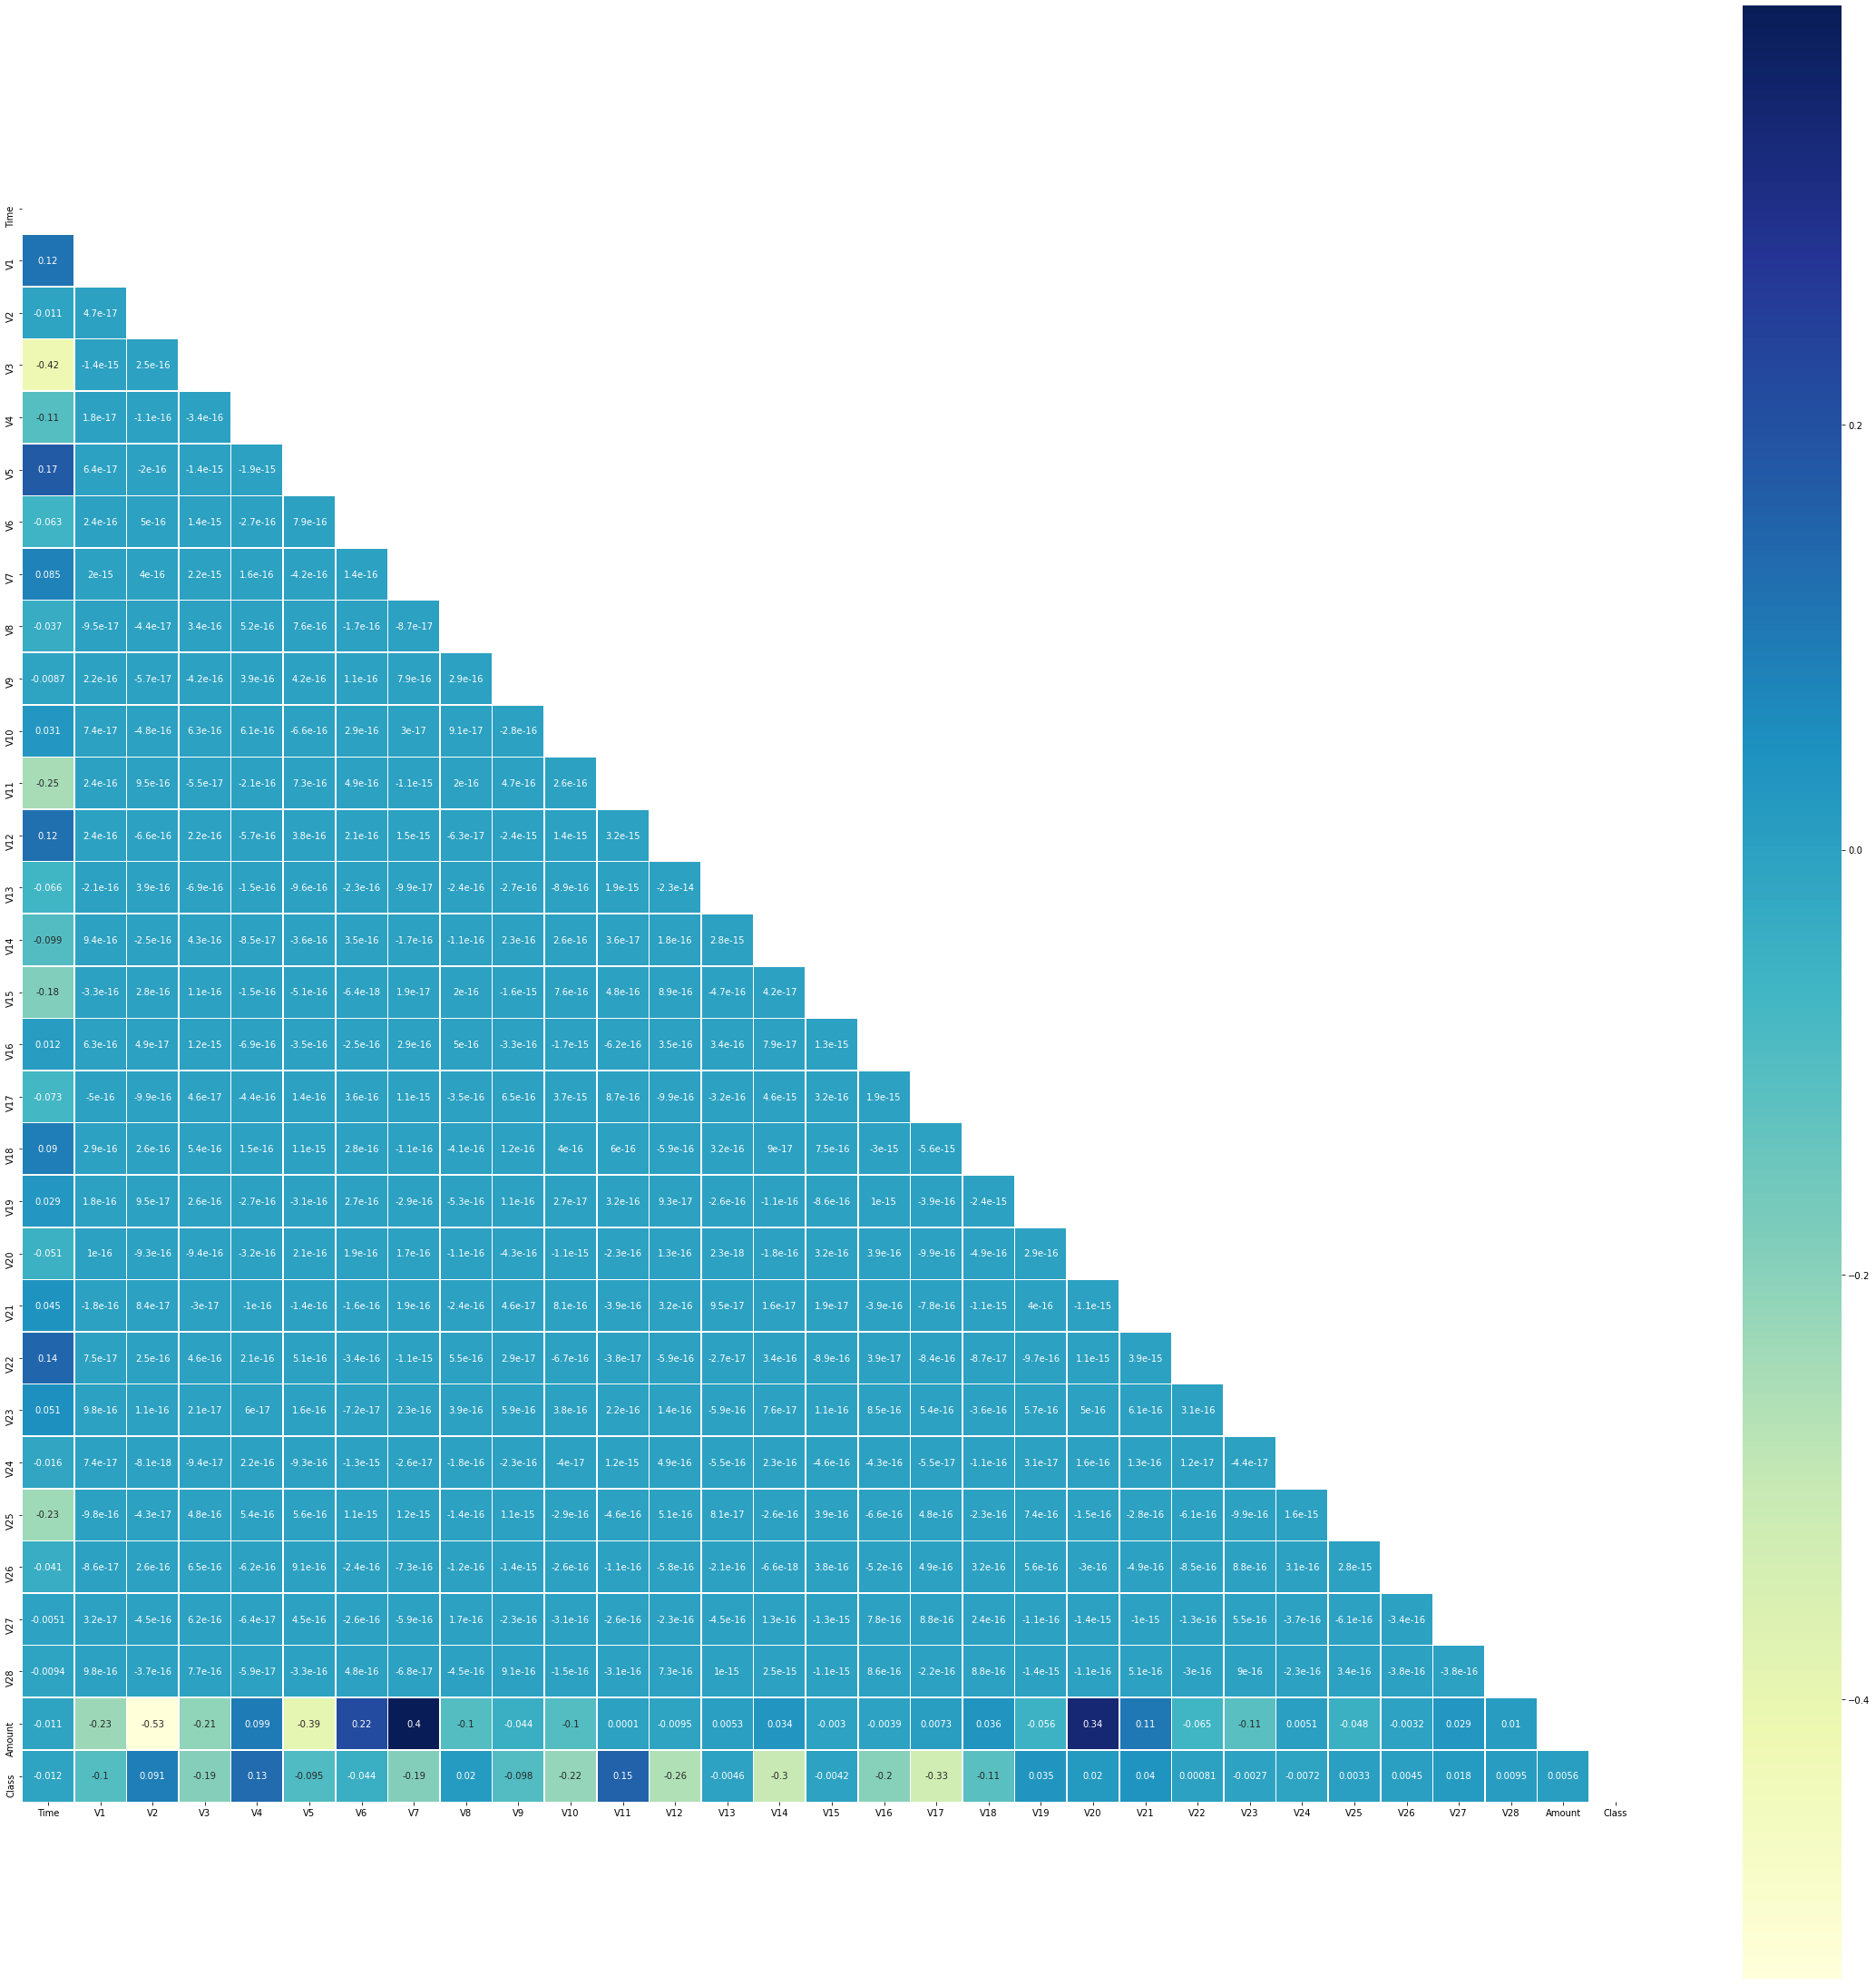

In [6]:
correlation = df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (40,40))
sns.heatmap(correlation, mask = mask, cmap = 'YlGnBu', annot = True, linewidth = .5, square = True)

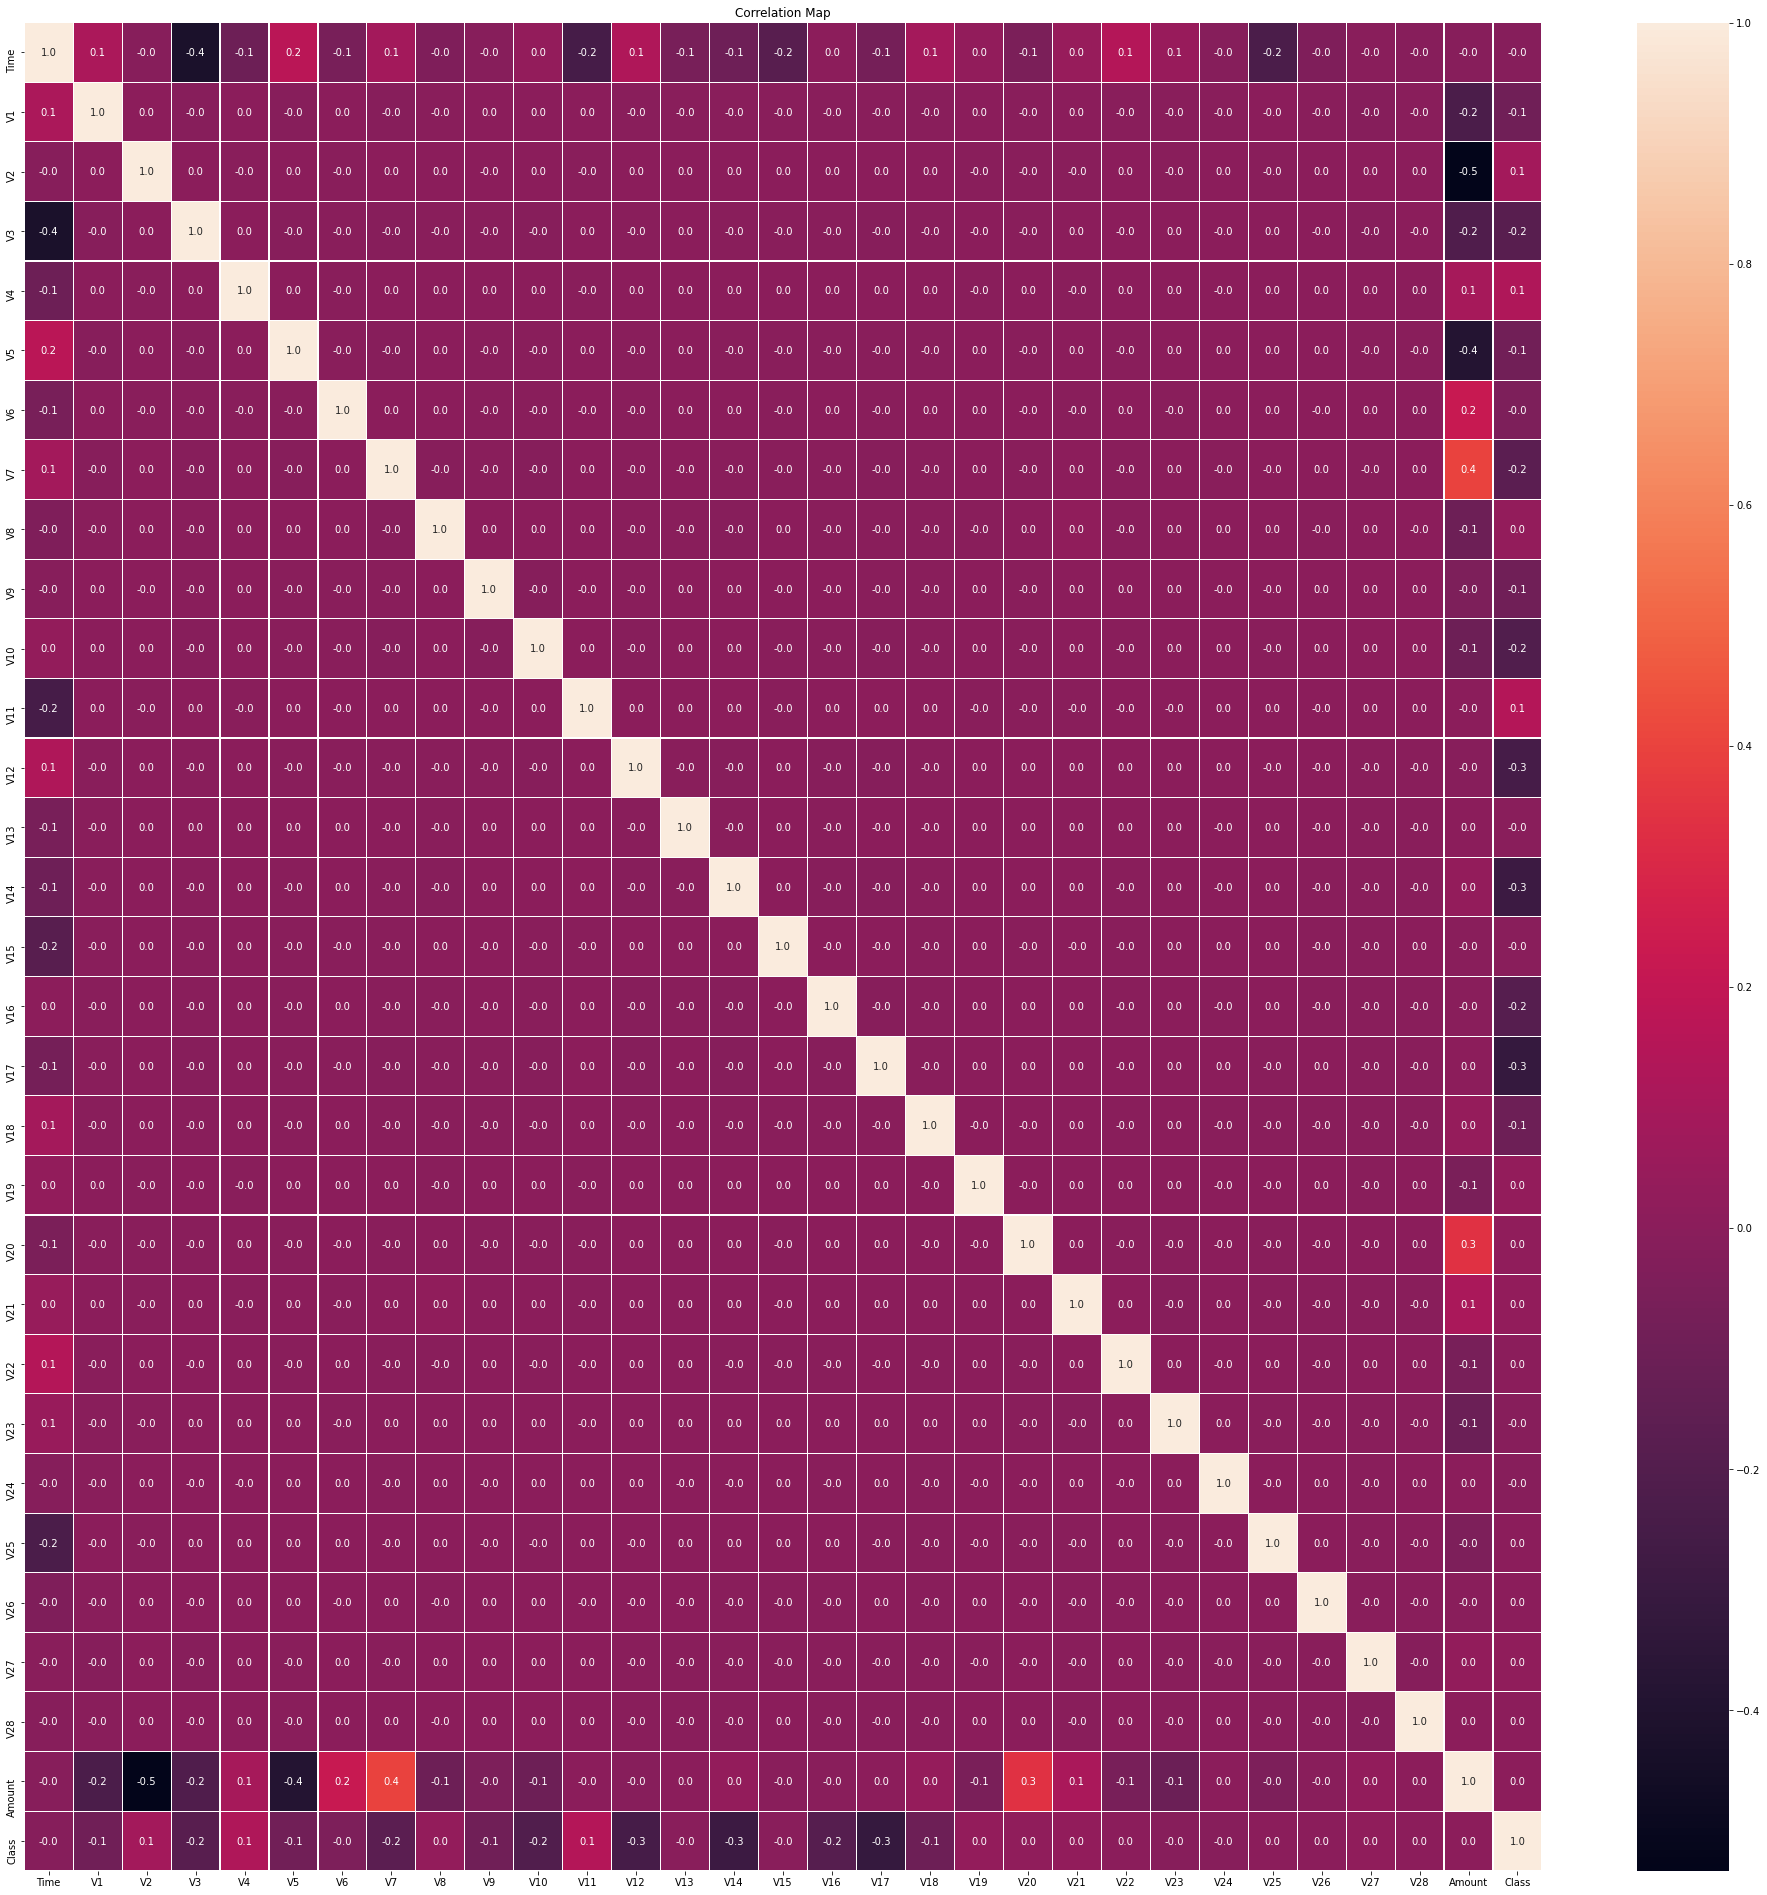

In [7]:
f,ax = plt.subplots(figsize=(34, 34 ))
sns.heatmap(df2.corr(), annot=True, linewidths=.1, fmt= '.1f', ax=ax)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [14]:
# Correllogram

# Plot
plt.figure(figsize=(50,40), dpi= 500)
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='YlGnBu', linewidth=0.5, center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Building Classification Models

In [10]:
# Defining 'Dependent' and 'Independent' variable
x = df2.iloc[:,0:30]
y = df2.iloc[:,df.columns=='Class']
print(y.Class.value_counts())

0    283253
1       473
Name: Class, dtype: int64


### Scaling
    

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [9]:
x.head()

0         1         2         3         4         5         6   \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         7         8         9   ...        20        21        22        23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

         24        25        26        27        28        29  
0  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  

[5 rows x 30 columns]

In [7]:
# Spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=1234)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(226980, 30)
(226980, 1)
(56746, 30)
(56746, 1)


In [9]:
print(y_train.Class.value_counts())
print(y_test.Class.value_counts())

0    226606
1       374
Name: Class, dtype: int64
0    56647
1       99
Name: Class, dtype: int64


In [15]:
print(x_train.dtypes)

In [10]:
#from sklearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans as MiniKM
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding the second hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=2, shuffle=True)

Epoch 1/10
5675/5675 - 6s - loss: 0.0154 - accuracy: 0.9982 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/10
5675/5675 - 4s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/10
5675/5675 - 4s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/10
5675/5675 - 3s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/10
5675/5675 - 4s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/10
5675/5675 - 4s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 7/10
5675/5675 - 3s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 8/10
5675/5675 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 9/10
5675/5675 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 10/10
5675/5675 - 4s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0033 - 

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [21]:
y_score = classifier.predict(x_test)
y_pred = (y_score > 0.5)

classifier.metrics_names
score = classifier.evaluate(x_test, y_test)
score

# model performence with f1-score and accuracy
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
print(cm)

# f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

# Accuracy_sccore
Acc = accuracy_score(y_test, y_pred)
print(Acc)

1781/1781 [==============================] - 1s 689us/step - loss: 0.0039 - accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.77      0.78        98

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56845    19]
 [   23    75]]
0.7812500000000001
0.9992626663389628


In [14]:
# plot(df)
y_score = classifier.predict(x_test)
y_pred = (y_score > 0.5)

classifier.metrics_names
score = classifier.evaluate(x_test, y_test)
score

# model performence with f1-score and accuracy
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
print(cm)

# f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

# Accuracy_sccore
Acc = accuracy_score(y_test, y_pred)
print(Acc)

1774/1774 [==============================] - 1s 616us/step - loss: 0.0038 - accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.85      0.76      0.80        99

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746

[[56634    13]
 [   24    75]]
0.8021390374331552
0.9993479716632009


In [35]:
# feature extraction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x1 = pca.fit_transform(x)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

NameError: name 'fit' is not defined

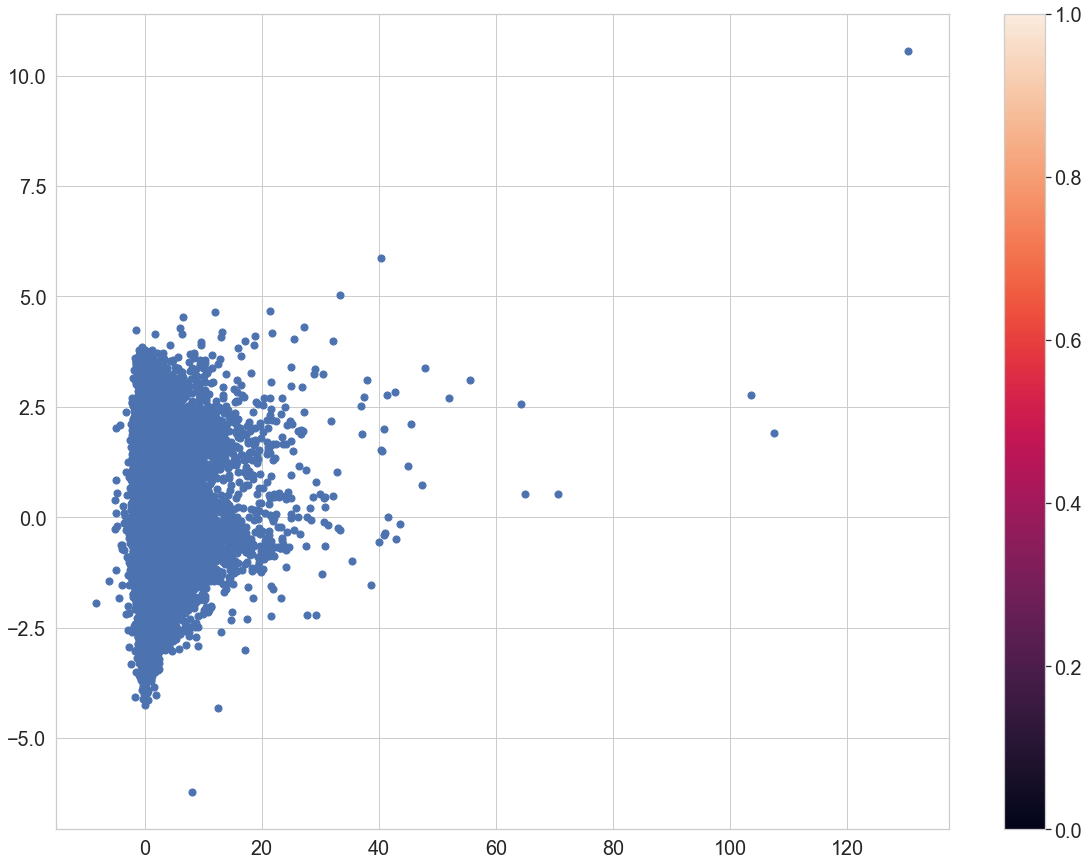

[[ 0.42924258 -2.48520999  0.85116541]
 [-0.39709808 -2.06945409 -0.59843739]
 [ 1.82852407 -2.58570497  0.00859932]
 ...
 [-0.17215916  1.93866335 -0.68263153]
 [-0.44402084  1.35844806  0.64196445]
 [ 0.76842373  1.85207885  0.81926141]]


In [34]:
pca = PCA(n_components=3) # for simplicity i choose 3

pca_results = pca.fit_transform(x)

cmap = sns.cubehelix_palette(as_cmap=True)
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1],  s=50, cmap=cmap)
tp.colorbar(temp)
plt.show()
print(pca_results)

In [ ]:
#separating the X and the Y values
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 